In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse_fun
from pandas import DataFrame

In [12]:
data = pd.read_csv("ADC.csv")
data.head()

,Player,Position,Games,Winrate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM*,...,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills
0,Moss,ADC,1,0.0,1.3,2.0,6.0,6.0,7.4,-,...,-,-,-,-,-,-,-,-,-,-
1,dan,ADC,1,0.0,-,1.0,0.0,2.0,7.0,285,...,0.11,0.31,0.06,-,-,-,-,-,-,-
2,p?,ADC,1,0.0,0.7,2.0,3.0,0.0,8.7,339,...,0.03,0.14,0,-,-,-,-,-,-,-
3,march,ADC,1,0.0,1,0.0,4.0,4.0,6.4,-,...,-,-,-,-,-,-,-,-,-,-
4,Alphari,ADC,1,0.0,1,2.0,5.0,3.0,8.2,398,...,0.37,0.04,0.11,1027,84,-449,1,0,0,-


In [13]:
data_columns =["Player","Position","Games","Winrate",
 "KDA","Avg kills","Avg deaths","Avg assists","CSM","GPM*",
 "%Dmg","Avg DPM","VSPM","Avg WPM","Avg WCPM","Avg VWPM",
 "GD@15","CSD@15","XPD@15","FB %","FB Victim","Penta Kills","Solo Kills"]

data = data.replace('-', np.nan)

missing_value = data.isnull().sum() 

total_missing_values = missing_value.sum()

print(missing_value,total_missing_values)

Player           0
Position         0
Games            0
Winrate          0
KDA              4
Avg kills        0
Avg deaths       0
Avg assists      0
CSM              0
GPM*            77
%Dmg            77
Avg DPM         77
VSPM           409
Avg WPM         77
Avg WCPM        77
Avg VWPM        77
GD@15          150
CSD@15         150
XPD@15         150
FB %           151
FB Victim      151
Penta Kills    121
Solo Kills     314
dtype: int64 2062


In [14]:

def get_most_frequent_value(data):
    return data.value_counts().index[0]
def get_most_frequent_frequency(data):
    return max(data.value_counts())


data.head()

mf_per_column = data[data_columns[2:]].apply(get_most_frequent_value,axis=0)





median_per_column = data[data_columns[2:]].apply(lambda x: x.median(), axis=0)


numeric_median_filled = data[data_columns[2:]].fillna(median_per_column, axis=0)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(numeric_median_filled) 
numeric_scaled = scaler.transform(numeric_median_filled) 
numeric_scaled = pd.DataFrame(numeric_scaled, columns=data_columns[2:])
cleaned_data= pd.concat((data[data_columns[0:2]],numeric_scaled), axis=1)
cleaned_data.head()
path = "c:\python37\mid_final.csv"
cleaned_data.to_csv(path)


c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.


In [15]:
mf_new_value = data[data_columns[2:]].apply(get_most_frequent_value,axis=0)
mf_new =cleaned_data[data_columns[2:]].apply(get_most_frequent_frequency,axis=0)
mf=pd.concat((mf_new_value,mf_new), axis=1)
mf.columns =(['FrequencyValue', 'FrequencyNumber'])
print(pd.DataFrame(mf))

            FrequencyValue  FrequencyNumber
Games                    1               50
Winrate                  0               74
KDA                    4.3               24
Avg kills                3               36
Avg deaths               2               71
Avg assists              5               30
CSM                    8.7               36
GPM*                   407               81
%Dmg                  28.1               84
Avg DPM                545               77
VSPM                  1.05              414
Avg WPM               0.38              102
Avg WCPM              0.19              101
Avg VWPM              0.08              118
GD@15                 -101              151
CSD@15                  -2              181
XPD@15                  19              151
FB %                     0              151
FB Victim                0              184
Penta Kills              0              630
Solo Kills               1              368


In [102]:
numeric_scaled_diff=numeric_scaled[data_columns[2:]].max() - numeric_scaled[data_columns[2:]].min()
print(numeric_scaled_diff)

Games           4.589550
Winrate         3.969064
KDA            10.098320
Avg kills       8.606604
Avg deaths     10.547048
Avg assists     8.319563
CSM             6.401508
GPM*            7.230546
%Dmg            9.812847
Avg DPM        11.175085
VSPM           10.195043
Avg WPM         6.838138
Avg WCPM        7.895729
Avg VWPM        6.312083
GD@15          10.164725
CSD@15         10.168906
XPD@15          9.862643
FB %            5.415257
FB Victim       8.893004
Penta Kills    10.617124
Solo Kills     15.693323
dtype: float64


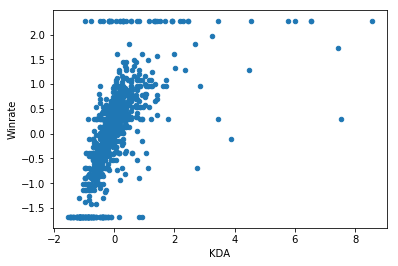

In [103]:
cleaned_data.plot.scatter('KDA','Winrate')

In [104]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

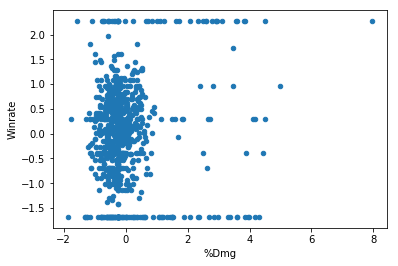

In [105]:
cleaned_data.plot.scatter('%Dmg','Winrate')

In [107]:
corr = numeric_scaled.corr().Winrate
corr = corr.drop('Winrate')
maxCorrFeat = corr.idxmax()
minCorrFeat = corr.idxmin()
corr=pd.DataFrame(corr)
corr.columns =(['correlation value'])
print(pd.DataFrame(corr))
print('\n{} had the highest correlation with wins and {} has the lowest.'.format(maxCorrFeat, minCorrFeat))

             correlation value
Games                 0.298374
KDA                   0.615259
Avg kills             0.359143
Avg deaths           -0.426509
Avg assists           0.444623
CSM                   0.132269
GPM*                  0.379098
%Dmg                  0.077833
Avg DPM               0.184549
VSPM                  0.046948
Avg WPM              -0.017146
Avg WCPM              0.074734
Avg VWPM              0.011221
GD@15                 0.370937
CSD@15                0.124133
XPD@15                0.231872
FB %                  0.249025
FB Victim            -0.032911
Penta Kills           0.036561
Solo Kills            0.163619

KDA had the highest correlation with wins and Avg deaths has the lowest.


In [108]:


xAll = np.array(numeric_scaled[["Games","KDA","Avg kills","Avg deaths","Avg assists","CSM","GPM*",
 "%Dmg","Avg DPM","VSPM","Avg WPM","Avg WCPM","Avg VWPM",
 "GD@15","CSD@15","XPD@15","FB %","FB Victim","Penta Kills","Solo Kills"]])
yAll = np.array(numeric_scaled.Winrate)

kf = KFold(n_splits = 5,random_state=2,shuffle=True)

RSquared = [0] * 5 
MSE = [0] * 5
#p_value = [0] * 5

for idx, [train_index, test_index] in enumerate(kf.split(xAll)):
    # Parition data for each loop 
    xTrain = xAll[train_index]
    yTrain = yAll[train_index]
    xTest = xAll[test_index]
    yTest = yAll[test_index]
    # Train model
    mdlSimple = LinearRegression()
    mdlSimple.fit(xTrain,yTrain)
#     p_value_calc(mdlSimple, xTrain, yTrain,printValues = 1)
    trainPred = mdlSimple.predict(xTest)
    RSquaredd = mdlSimple.score(xTest,yTest) 
    error = trainPred - yTest
    mse = np.mean((error)**2)
    RSquared[idx] = RSquaredd
    MSE[idx] = mse
    coef = np.append(mdlSimple.intercept_, mdlSimple.coef_)
    data_columns =["Intercept","Games","KDA","Avg kills","Avg deaths","Avg assists","CSM","GPM*",
                   "%Dmg","Avg DPM","VSPM","Avg WPM","Avg WCPM","Avg VWPM",
                   "GD@15","CSD@15","XPD@15","FB %","FB Victim","Penta Kills","Solo Kills"]
    coefdf = pd.DataFrame({"coef" : coef},index=data_columns)
    print(coefdf)
#     print(mdlSimple.coef_,len(mdlSimple.coef_))
    
print(' {} {}'.format(RSquared,MSE))

                 coef
Intercept   -0.007609
Games        0.099112
KDA          0.128238
Avg kills    0.158075
Avg deaths  -0.355394
Avg assists  0.253713
CSM         -0.191535
GPM*         0.685258
%Dmg        -0.441022
Avg DPM      0.062083
VSPM         0.077596
Avg WPM     -0.078354
Avg WCPM    -0.050987
Avg VWPM    -0.029100
GD@15        0.205006
CSD@15      -0.062316
XPD@15      -0.167126
FB %         0.037199
FB Victim    0.099382
Penta Kills -0.016519
Solo Kills  -0.005448
                 coef
Intercept    0.003712
Games        0.113122
KDA          0.153924
Avg kills    0.133504
Avg deaths  -0.276960
Avg assists  0.242891
CSM         -0.273546
GPM*         0.776484
%Dmg        -0.352590
Avg DPM     -0.172001
VSPM         0.040453
Avg WPM     -0.056551
Avg WCPM    -0.054334
Avg VWPM    -0.023354
GD@15        0.323931
CSD@15       0.026574
XPD@15      -0.261150
FB %         0.076546
FB Victim    0.105422
Penta Kills -0.013759
Solo Kills  -0.008079
                 coef
Intercept 

In [109]:
sales = [ [RSquared[0],MSE[0]],
          [RSquared[1],MSE[1]],
          [RSquared[2],MSE[2]],
          [RSquared[3],MSE[3]],
          [RSquared[4],MSE[4]]]
df = pd.DataFrame(sales)
df.columns =(['R^2','MSE'])
print(df)

        R^2       MSE
0  0.619790  0.350543
1  0.604138  0.320514
2  0.609880  0.440637
3  0.646962  0.349301
4  0.611744  0.440254


In fold 0 there are 139 observations. 
In fold 1 there are 138 observations. 
In fold 2 there are 138 observations. 
In fold 3 there are 138 observations. 
In fold 4 there are 138 observations. 

Across the five folds:
 the average MSE is 0.38763821518771396
 the average R-squared is 0.612088466880113.


Text(0.5, 1.0, 'R^2')

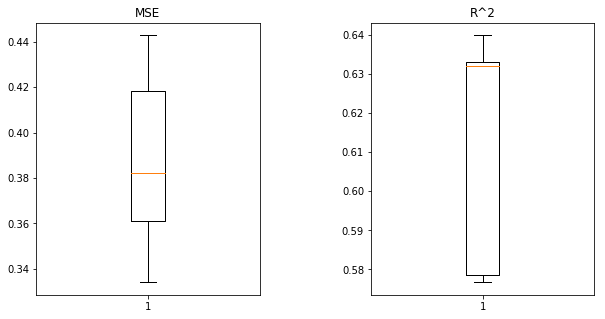

In [48]:
for idx, [train_index, test_index] in enumerate(kf.split(xAll)):
    xTest = xAll[test_index]
    length =len(xTest)
    print('In fold {} there are {} observations. '.format(idx,length))
    
avgRSquared = np.mean(RSquared)
avgMSE = np.mean(MSE)
print('\nAcross the five folds:\n the average MSE is {}\n the average R-squared is {}.'.format(avgMSE,avgRSquared))

plt.figure(figsize=(10,5))
matplotlib.pyplot.subplots_adjust(wspace = 0.5)

plt.subplot(121)
plt.boxplot(MSE)
plt.title('MSE')
plt.subplot(122)
plt.boxplot(RSquared)
plt.title('R^2')


In [36]:
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse_fun

def p_value_calc(mdl, xValues, yValues,printValues = 1):
    # The following function calculated the p values of each coeffcient 
    # from a trained model. 
    
    # get model parameters and prediction
    yPred = mdl.predict(xValues)
    params = np.append(mdl.intercept_,mdl.coef_)
    
    # Calculate the MSE using built in function
    MSE = mse_fun(y_pred=yPred,y_true=yValues)
    
    # Clear features (xValues) and join it to vector of ones (i.e., y-intercept feature)
    xValues = xValues.reset_index(drop=True)
    interceptOnes = pd.DataFrame({"Intercept":np.ones(len(xValues))})
    newX = interceptOnes.join(xValues)
   
    # Calculate variance and standard deviation of the regression coefficents
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    
    # Calculate p values using the t-test
    tScores = params / sd_b
    degreesOfFreedom = len(xValues)-2
    pValues =[2*(1-stats.t.cdf(np.abs(tScore),degreesOfFreedom)) for tScore in tScores]
    L = list(range(1,len(pValues)))
    for i in L:
        pValues[i]=format(pValues[i], '.8f')
    pValues = pd.DataFrame({"pValue" : pValues},index=newX.columns)
    print(pValues)
    return pValues



In [110]:
def split(df, headSize) :
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

rows = len(numeric_scaled['Games'])
n=0.70*rows
nn = round(n) 
#rand = np.random.permutation(nn) 
dfTrain,dfTest = split(numeric_scaled, nn)

xTrain = dfTrain.drop(columns=['Winrate'])
yTrain = dfTrain.Winrate

mdlMultiNaive = LinearRegression()
mdlMultiNaive.fit(xTrain, yTrain)

print('Training set evaluation:')

trainPred = mdlMultiNaive.predict(xTrain)
RSquared = mdlMultiNaive.score(xTrain,yTrain) 

error = trainPred - yTrain
mse = np.mean((error)**2)

print('R^2 value is {} MSE value is {}'.format(RSquared,mse))

data_columns =["Games",
 "KDA","Avg kills","Avg deaths","Avg assists","CSM","GPM*",
 "%Dmg","Avg DPM","VSPM","Avg WPM","Avg WCPM","Avg VWPM",
 "GD@15","CSD@15","XPD@15","FB %","FB Victim","Penta Kills","Solo Kills"]

coef = pd.DataFrame({"coef" : mdlMultiNaive.coef_},index=data_columns)
print(coef)

p_value_calc(mdlMultiNaive, xTrain, yTrain,printValues = 1)
print('\nTesting set evaluation:')


xTest = dfTest.drop(columns=['Winrate'])
yTest = dfTest.Winrate
trainPred = mdlMultiNaive.predict(xTest)
RSquared = mdlMultiNaive.score(xTest,yTest) 


error = trainPred - yTest
mse = np.mean((error)**2)

print('R^2 value is {} MSE value is {}'.format(RSquared,mse))
print (xTrain)

Training set evaluation:
R^2 value is 0.6636236437439291 MSE value is 0.3229895082190921
                 coef
Games        0.096065
KDA          0.156017
Avg kills    0.249799
Avg deaths  -0.325204
Avg assists  0.267101
CSM         -0.107961
GPM*         0.497820
%Dmg        -0.230401
Avg DPM     -0.104187
VSPM         0.015643
Avg WPM     -0.059654
Avg WCPM    -0.004110
Avg VWPM    -0.059019
GD@15        0.256353
CSD@15      -0.157199
XPD@15      -0.128913
FB %         0.077841
FB Victim    0.134148
Penta Kills  0.023365
Solo Kills  -0.016164
                 pValue
Intercept       0.95631
Games        0.00171229
KDA          0.00159961
Avg kills    0.00000224
Avg deaths   0.00000000
Avg assists  0.00000000
CSM          0.20147325
GPM*         0.00000006
%Dmg         0.00845245
Avg DPM      0.23647954
VSPM         0.75493500
Avg WPM      0.23126547
Avg WCPM     0.90305920
Avg VWPM     0.09754557
GD@15        0.00025212
CSD@15       0.02514185
XPD@15       0.08516940
FB %         0.01